In [1]:
import math
import numpy as np
import torch
import torchvision.utils
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.color import rgb2gray
from skimage.metrics import structural_similarity

In [2]:
def imsshow(imgs, titles=None, num_col=5, dpi=100, cmap=None, is_colorbar=False, is_ticks=False):
    '''
    assume imgs's shape is (Nslice, Nx, Ny)
    '''
    num_imgs = len(imgs)
    num_row = math.ceil(num_imgs / num_col)
    fig_width = num_col * 3
    if is_colorbar:
        fig_width += num_col * 1.5
    fig_height = num_row * 3
    fig = plt.figure(dpi=dpi, figsize=(fig_width, fig_height))
    for i in range(num_imgs):
        ax = plt.subplot(num_row, num_col, i + 1)
        im = ax.imshow(imgs[i], cmap=cmap)
        if titles:
            plt.title(titles[i])
        if is_colorbar:
            cax = fig.add_axes([ax.get_position().x1 + 0.01, ax.get_position().y0, 0.01, ax.get_position().height])
            plt.colorbar(im, cax=cax)
        if not is_ticks:
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()
    plt.close('all')

## Dataset

We select 200 cines from ACDC datasets, presented by a numpy array `(200, 20, 192, 192)`.

Preprocessing steps:

1. Discarded first and last 3 slices,
2. Truncated time dimensions to 20,
3. Croped and padded to 192x192,
4. Min-max normalized on each dynamic image.

Finally, we stacked all cines together, random permutated, selected first 200 cines.  

In [3]:
dataset = np.load('./cine.npz')['dataset']

In [4]:
print(dataset.shape, dataset.dtype)

(200, 20, 192, 192) float32


Cine's min: 0.0, max: 1.0


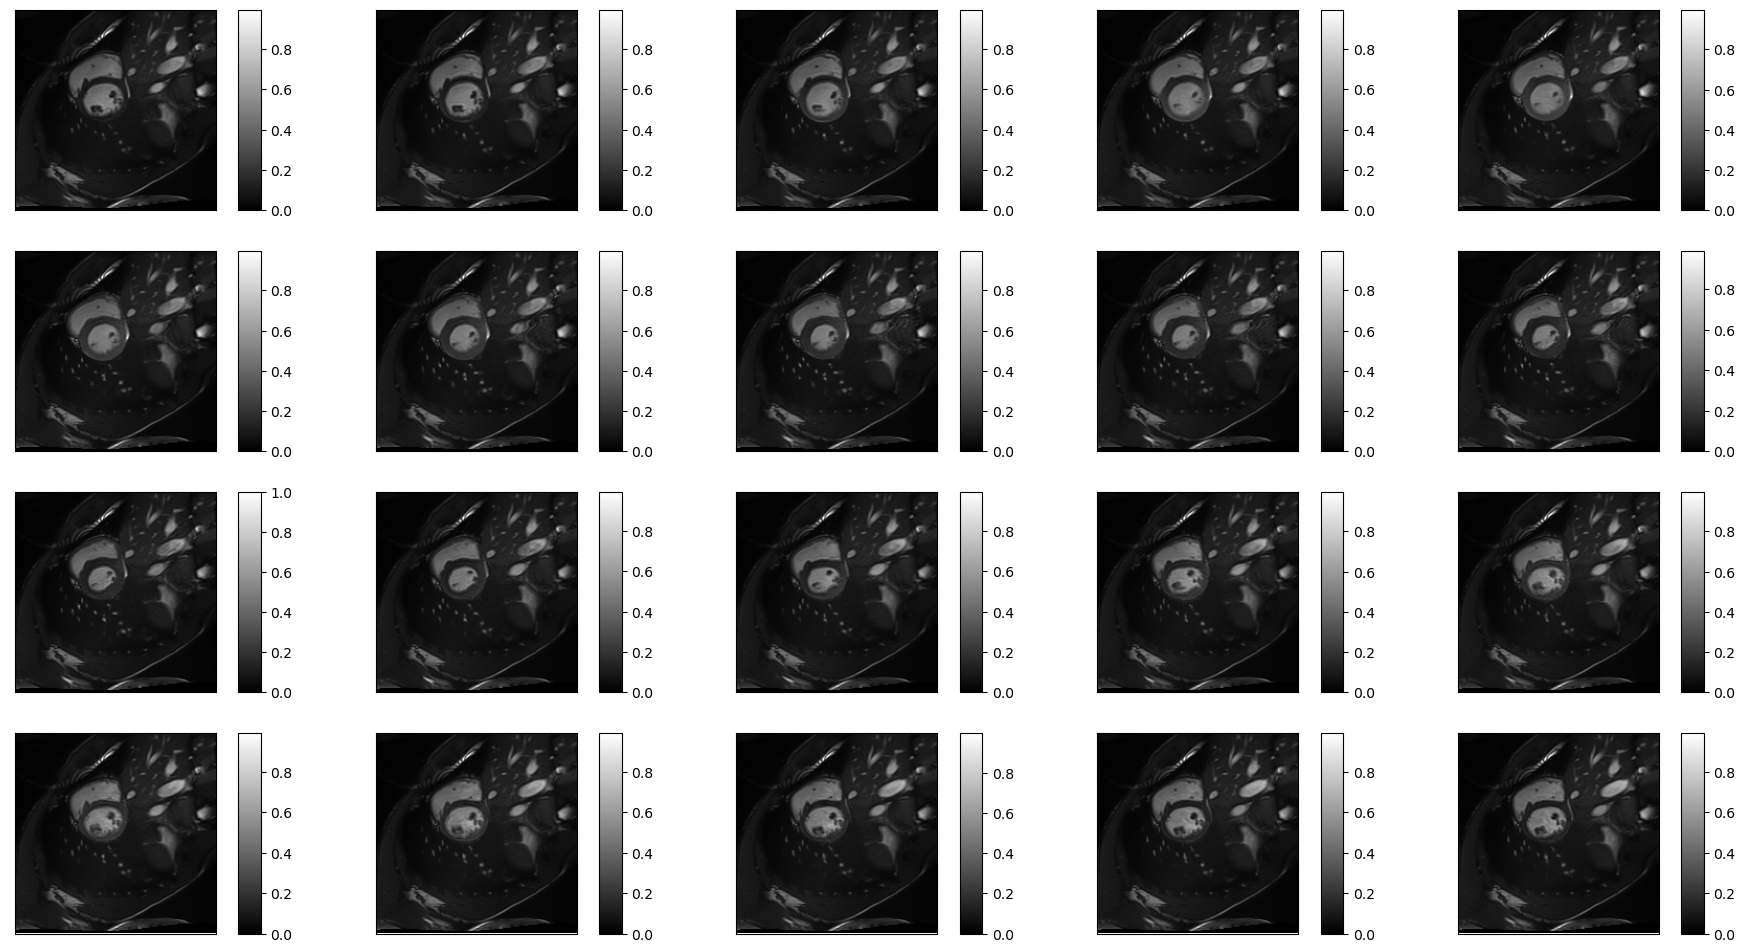

In [11]:
# example cine
CINE_INDEX = 10
assert CINE_INDEX >= 0 and CINE_INDEX < 200
cine = dataset[CINE_INDEX]
print(f"Cine's min: {cine.min()}, max: {cine.max()}")
imsshow(cine, num_col=5, cmap='gray', is_colorbar=True)

In [10]:
dataset.shape

(200, 20, 192, 192)

## variable-density undersampling mask

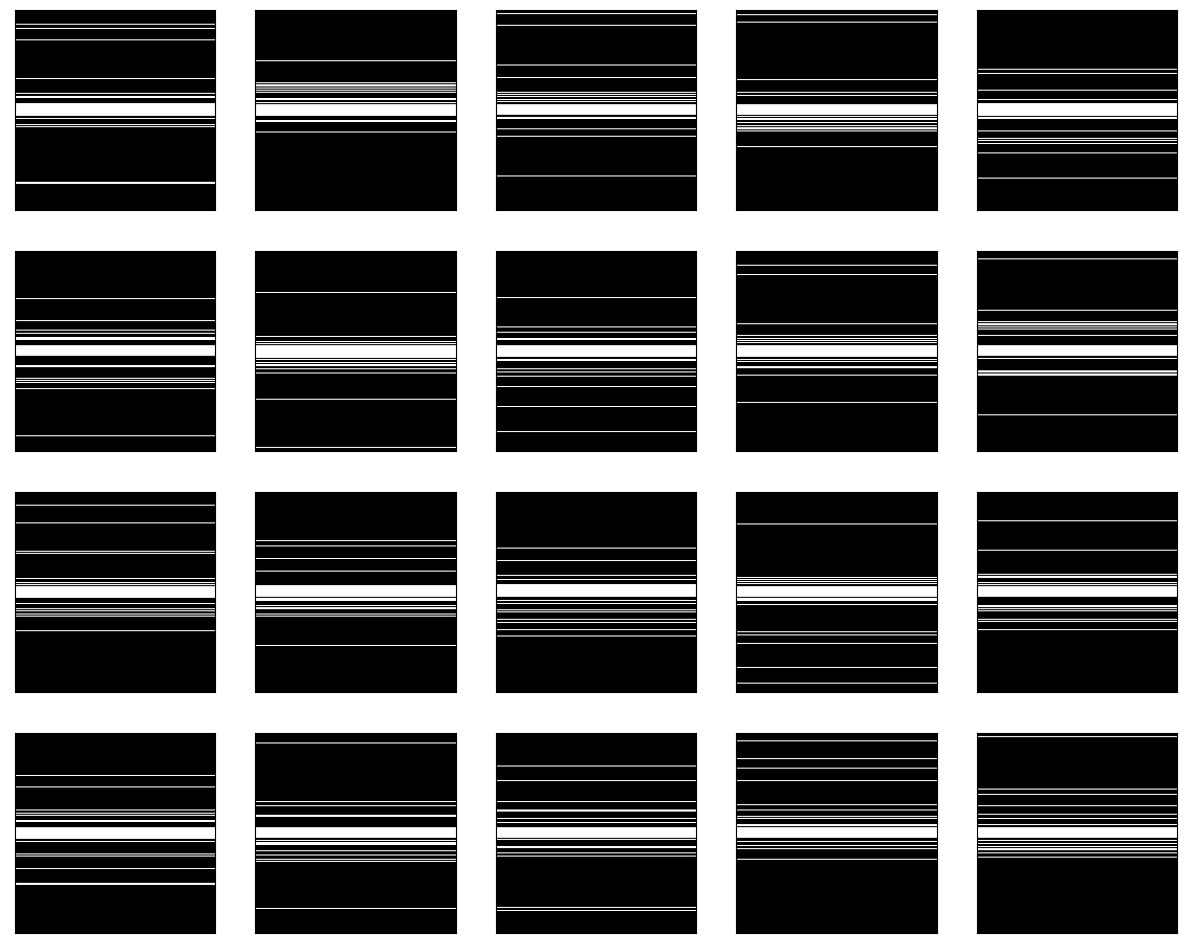

In [6]:
from CS_mask import cartesian_mask

mask = cartesian_mask(shape=(1, 20, 192, 192), acc=8, sample_n=10, centred=True)
imsshow(mask[0, :, :, :], num_col=5, cmap='gray')

In [12]:
mask[0,:,:,:].shape

(20, 192, 192)